<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(df.head(15))
df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# Посмотрим сколько пропусков в каждом из солбцов датафрейма.
print('Количество пропущеных значений по каждому столбцу датафрейма.')
display(df.isna().sum().sort_values(ascending=False))
print('')

# Посчитаем процент пропусков в данных для каждого столбца в датафрейме.
percent_of_nan = df.isna().sum()/len(df)*100
print('Процент пропусков в столбцах датафрейма.')
display(percent_of_nan.sort_values(ascending=False))
print('')

# Выявим количество явнях дубликатов в датафрейме.
df.duplicated().count()

Количество пропущеных значений по каждому столбцу датафрейма.


is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64


Процент пропусков в столбцах датафрейма.


is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

23699

### Вывод

Попредворительному просмотру данных можно понять что в таблице 23699 строк и 22 колонки. Не во всех столбцах присутствуют значения, это мы можем понять по вызову команды info. Так например присутствуют пропуски в колонках ceiling_height, floors_total, living_area и т.д. Предворительно просмотрев эти столбцы можно понять какие действия стоит предпринимать при предобработке. К примеру: Для столбца ceiling_height - высота потолков пропуски присутствуют так как не все пользователи считали нужным их заполнять, таким образом стоит оставить пропущенные значения в данном столбце без изменений. Аналогичные логические суждения мы будем предпринимать в следующем шаге "Предобработка данных".

## Предобработка данных

В предобработке данных будем следовать списку пропущенных значений из предыдущего шага, от столбцов с большим количеством пропусков к меньшим: 
* is_apartment        
* parks_nearest       
* ponds_nearest       
* balcony             
* ceiling_height      
* airports_nearest    
* cityCenters_nearest 
* ponds_around3000    
* parks_around3000    
* days_exposition     
* kitchen_area         
* living_area          
* floors_total         
* locality_name        
* total_images         
* last_price           
* studio               
* floor               
* rooms                
* first_day_exposition 
* total_area           
* open_plan      

**Предобработка в столбце** `is_apartment` - апартаменты (булев тип).

In [4]:
# Проверим пропуски в столбце 'is_apartment'.
print('Количество пропусков:', df['is_apartment'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['is_apartment'].value_counts())

# Cтолбец апартаменты видимо появился не вместе с началом ведения записей, все пропущенные значения заменим на False, 
# апартаменты появились относительно недавно.
df['is_apartment'] = df['is_apartment'].fillna(False)

# Переведем значения столбца из булевого типа в числовой.
df['is_apartment'] = df['is_apartment'].astype('int')

Количество пропусков: 20924

False    2725
True       50
Name: is_apartment, dtype: int64


**Предобработка в столбце** `parks_nearest` - расстояние до ближайшего парка (м).

In [5]:
# Проверим пропуски в столбце 'parks_nearest'.
print('Количество пропусков:', df['parks_nearest'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['parks_nearest'].value_counts()) # Данные в порядке.

# Заменим пропуски в столбце на '0'. и приведем значения столбца к целочисленным.
df['parks_nearest'] = df['parks_nearest'].fillna(0).astype('int')

# В данных присутстуют пропуски которые мы не можем заполнить медианным значением, так как действительное расстояние до парка
# может отличаться, такая замена не будет отражать реального расстояния до парка в действительноси.

Количество пропусков: 15620

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64


**Предобработка в столбце** `ponds_nearest` - расстояние до ближайшего водоёма (м).

In [6]:
# Проверим пропуски в столбце 'ponds_nearest'.
print('Количество пропусков:', df['ponds_nearest'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['ponds_nearest'].value_counts())

# Заменим пропуски в столбце на '0'. и приведем значения столбца к целочисленным.
df['ponds_nearest'] = df['ponds_nearest'].fillna(0).astype('int')

# В данных присутстуют пропуски которые мы не можем заполнить медианным значением, так как действительное расстояние до водоема
# может отличаться, такая замена не будет отражать реального расстояния до водоема в действительноси.

Количество пропусков: 14589

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64


**Предобработка в столбце** `balcony` - число балконов.

In [7]:
# Проверим пропуски в столбце 'balcony'.
print('Количество пропусков:', df['balcony'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['balcony'].value_counts())

# Пропуски в этом столбце обусловленны тем что пользователь который разместил обьявление не стал указывать количество балконов в
# виду его отсутствия.
# Заменим пропуски в столбце на '0'. и приведем значения столбца к целочисленным.
df['balcony'] = df['balcony'].fillna(0).astype('int')

Количество пропусков: 11519

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


**Предобработка в столбце** `ceiling_height` -  высота потолков (м).

In [8]:
# Проверим пропуски в столбце 'ceiling_height'.
print('Количество пропусков:', df['ceiling_height'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
# В столбце можно заметить аномалии, такие как: потолок высотой 10.30 м. Но такое значение всего одно и не повлияет на расчеты.
print(df['ceiling_height'].value_counts())
print('')

# Для пропущенных значений в данном столбце хорошо подойдет замена на медианное. Так как в целом в большинстве жилых площадей 
# высота потолков в среднем равна 2.77 (м).
print(df['ceiling_height'].describe())
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Количество пропусков: 9195

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


**Предобработка в столбце** `airports_nearest` - расстояние до ближайшего аэропорта в метрах (м).

In [9]:
# Проверим пропуски в столбце 'airports_nearest'.
print('Количество пропусков:', df['airports_nearest'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['airports_nearest'].value_counts()) # Данные в порядке.

# Пропуски в данном столбце неполучится заменить на усредненное или медианное, так как такие изменения не будут соответсвовать
# действительности.

Количество пропусков: 5542

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64


**Предобработка в столбце** `cityCenters_nearest` - расстояние до ближайшего аэропорта в метрах (м).

In [10]:
# Проверим пропуски в столбце 'cityCenters_nearest'.
print('Количество пропусков:', df['cityCenters_nearest'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['cityCenters_nearest'].value_counts())# Данные в порядке.

# Пропуски в данном столбце неполучится заменить на усредненное или медианное, так как такие изменения не будут соответсвовать
# действительности.

Количество пропусков: 5519

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: cityCenters_nearest, Length: 7642, dtype: int64


**Предобработка в столбце** `ponds_around3000` - число водоёмов в радиусе 3 км.

In [11]:
# Проверим пропуски в столбце 'ponds_around3000'.
print('Количество пропусков:', df['ponds_around3000'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['ponds_around3000'].value_counts())# Данные в порядке.

# Скорее всего пропуски в данном столбце обусловленны тем что пользователь не отмечал количество водоемов вокруг недвижимости
# В виду их отсутствия можно изменить пропуски в солбце на '0', так же преведем данне в целочисленные.
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype('int')

Количество пропусков: 5518

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64


**Предобработка в столбце** `parks_around3000` - число парков в радиусе 3 км.

In [12]:
# Проверим пропуски в столбце 'parks_around3000'.
print('Количество пропусков:', df['parks_around3000'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['parks_around3000'].value_counts())# Данные в порядке.

# Скорее всего пропуски в данном столбце обусловленны тем что пользователь не отмечал количество парков вокруг его недвижимости
# В виду их отсутствия можно изменить пропуски в солбце на '0', так же преведем данне в целочисленные.
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')

Количество пропусков: 5518

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64


**Предобработка в столбце** `days_exposition` - сколько дней было размещено объявление (от публикации до снятия).

In [13]:
# Проверим пропуски в столбце 'days_exposition'.
print('Количество пропусков:', df['days_exposition'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['days_exposition'].value_counts())# Данные в порядке.

# Пропуски в данном столбце уместно заполнить на '0'. Так как если присутствует пропуск значит обьявление еще не снято.
# Приведем значения столбца к целочисленным.
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

Количество пропусков: 3181

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64


**Предобработка в столбце** `kitchen_area` - площадь кухни в квадратных метрах (м²).

Количество пропусков: 2278

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64
count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

count    21421.000000
mean        18.735474
std          7.296781
min          2.538071
25%         13.333333
50%         17.241379
75%         23.241590
max         78.787879
dtype: float64



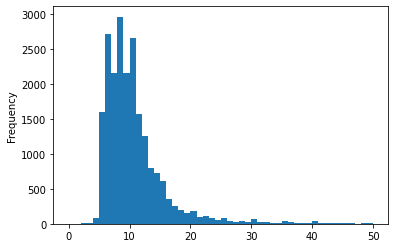

In [14]:
# Проверим пропуски в столбце 'kitchen_area'.
print('Количество пропусков:', df['kitchen_area'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['kitchen_area'].value_counts())
print(df['kitchen_area'].describe())# Присутствует аномальное значение 1м².

# Из-за типового строительства на гистограме мы можем наблюдать выброс в районе 18м² для кухонь.
# В целом аномальные значения не влияют на расчеты, так как не представляют с собой большой обьем выбросов.
df['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 50, range=(0,50))
print('')

# Для замены пропусков в столбце найдем отношение площади кухни к общей площади.
coefficient_kitchen_area = df['kitchen_area']/df['total_area']*100
print(coefficient_kitchen_area.describe())
print('')
df['kitchen_area'] = df['kitchen_area'].fillna(coefficient_kitchen_area.mean().astype('int'))

**Предобработка в столбце** `living_area` - жилая площадь в квадратных метрах (м²).

Количество пропусков: 0

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


count    21796.000000
mean        56.476552
std         10.536828
min          2.158273
25%         49.517685
50%         56.785990
75%         63.787984
max        100.000000
dtype: float64



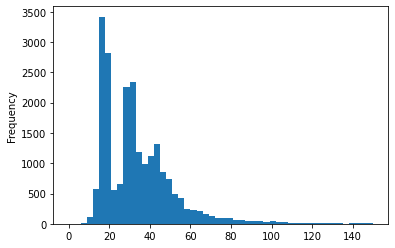

In [15]:
# Проверим пропуски в столбце 'living_area'.
print('Количество пропусков:', df['kitchen_area'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['living_area'].value_counts())
print(df['living_area'].describe())# В данных присутствует мининимальная жилая площадь 2 м².
print('')

# На графике заметны выбросы, так как жилой фонд в СПБ формировался в разные годы, в плоть от царских времен мы можем наблюдать
# широкие различия размера жилой площади. Дороговизна квартир в центре СПБ предпологает малую жилую площадь, отсюда например
# становится понятно такое широкое распростронение квартир с жилой площадью 18 м²
df['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 50, range=(0,150))
print('')

# Для замены пропусков в столбце найдем отношение жилой площади к общей площади.
coefficient_kitchen_area = df['living_area']/df['total_area']*100
print(coefficient_kitchen_area.describe())
print('')
df['living_area'] = df['living_area'].fillna(coefficient_kitchen_area.mean().astype('int'))

**Предобработка в столбце** `floors_total` -  всего этажей в доме.

In [16]:
# Проверим пропуски в столбце 'floors_total'.
print('Количество пропусков:', df['floors_total'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
# print(df['floors_total'].value_counts())
print(df['floors_total'].describe())

# Для пропущенных значений в столбце нельзя подобрать значений, возможно пропуски являются призноком того что в обьявлении 
# размещена не квартира а дом, но в таком случаи мы никак не можем это проверить.

Количество пропусков: 86

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


**Предобработка в столбце** `locality_name` -  название населённого пункта.

In [17]:
# Проверим пропуски в столбце 'locality_name'.
print('Количество пропусков:', df['locality_name'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['locality_name'].value_counts())
print(df['locality_name'].describe())

# Пропуски в данном столбце невозможно заменить другими значениями, по этому оставим все как есть.

Количество пропусков: 49

Санкт-Петербург            15721
посёлок Мурино               522
посёлок Шушары               440
Всеволожск                   398
Пушкин                       369
                           ...  
поселок Цвылёво                1
деревня Рапполово              1
деревня Щеглово                1
поселок станции Лужайка        1
посёлок Дзержинского           1
Name: locality_name, Length: 364, dtype: int64
count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object


**Предобработка в столбце** `total_images` -  название населённого пункта.

In [18]:
# Проверим пропуски в столбце 'total_images'.
print('Количество пропусков:', df['total_images'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
# print(df['total_images'].value_counts())
print(df['total_images'].describe())

# Данные в порядке.

Количество пропусков: 0

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


**Предобработка в столбце** `last_price` - название населённого пункта.

In [19]:
# Проверим пропуски в столбце 'last_price'.
print('Количество пропусков:', df['last_price'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['last_price'].value_counts())

# Приведем тип данных к целочисленному.
df['last_price'] = df['last_price'].astype('int')

Количество пропусков: 0

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64


**Предобработка в столбце** `studio` - квартира-студия (булев тип).

In [20]:
# Проверим пропуски в столбце 'studio'.
print('Количество пропусков:', df['studio'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['studio'].value_counts())

# Переведем значения столбца из булевого типа в числовой.
df['studio'] = df['studio'].astype('int')

Количество пропусков: 0

False    23550
True       149
Name: studio, dtype: int64


**Предобработка в столбце** `floor` - этаж.

In [21]:
# Проверим пропуски в столбце 'floor'.
print('Количество пропусков:', df['floor'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
# print(df['floor'].value_counts()) # Данные в порядке.

Количество пропусков: 0



**Предобработка в столбце** `rooms` - число комнат.

In [22]:
# Проверим пропуски в столбце 'rooms'.
print('Количество пропусков:', df['rooms'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
# print(df['rooms'].value_counts()) # Данные в порядке.

Количество пропусков: 0



**Предобработка в столбце** `first_day_exposition` - дата публикации.

In [23]:
# Проверим пропуски в столбце 'first_day_exposition'.
print('Количество пропусков:', df['first_day_exposition'].isna().sum())
print('')

# Переведем столбец с датой в формат даты без времени, т.к. время не указано.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

Количество пропусков: 0



**Предобработка в столбце** `total_area` - площадь квартиры в квадратных метрах (м²).

In [24]:
# Проверим пропуски в столбце 'total_area'.
print('Количество пропусков:', df['total_area'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['total_area'].value_counts())
# Данные в порядке, оставляем столбец без изменений.

Количество пропусков: 0

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64


**Предобработка в столбце** `open_plan` - площадь квартиры в квадратных метрах (м²).

In [25]:
# Проверим пропуски в столбце 'open_plan'.
print('Количество пропусков:', df['open_plan'].isna().sum())
print('')

# Проверим столбец для выявления нестандартных значений на первый взгляд и ошибок.
print(df['open_plan'].value_counts())

# Переведем значения столбца из булевого типа в числовой.
df['open_plan'] = df['open_plan'].astype('int')

Количество пропусков: 0

False    23632
True        67
Name: open_plan, dtype: int64


**Проверим предобработку и выведем датафрейм на экран.**

In [26]:
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,0,0,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,0,0,0,11.00,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,0,0,0,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,56.00,9,0,0,0,18.00,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,0,0,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,0,0,0,9.10,0,городской посёлок Янино-1,NaN,NaN,0,0,0,0,55
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,0,0,0,14.40,1,посёлок Парголово,52996.0,19143.0,0,0,0,0,155
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,56.00,22,0,0,0,18.90,2,Санкт-Петербург,23982.0,11634.0,0,0,0,0,0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,0,0,0,8.81,0,посёлок Мурино,NaN,NaN,0,0,0,0,189
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,0,0,0,6.50,2,Санкт-Петербург,50898.0,15008.0,0,0,0,0,289


## Расчёты и добавление результатов в таблицу

In [27]:
# Выполним расчеты для выявления цены за квадратный метр.
# Приведем данные столбца к целочисленным значениям.
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')


# Создадим столбец дня недели.
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

# Создадим столбец месяца.
df['month_exposition'] = df['first_day_exposition'].dt.month

# Создадим столбец года.
df['year_exposition'] = df['first_day_exposition'].dt.year



# Напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

# Категоризуем этажи с помощью функции.
df['floor_category'] = df.apply(floor_category, axis = 1)



# Добавим столбец соотношения жилой плозади к общей.
df['useful_area_ratio'] = df['living_area'] / df['total_area']

# Добавим столбец отношения площади кухни к общей.
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

# Проверим результат выведем первые 15 строк датафрейма на экран.
display(df.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,0,0,0,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482,2,755,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,0,0,0,11.00,2,посёлок Шушары,12817.0,18603.0,0,0,0,0,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,0,0,0,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90,2,574,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,56.00,9,0,0,0,18.00,0,Санкт-Петербург,28098.0,6800.0,2,84,3,234,424,408176,4,7,2015,другой,0.352201,0.113208
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,0,0,0,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112,1,48,121,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,0,0,0,9.10,0,городской посёлок Янино-1,NaN,NaN,0,0,0,0,55,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,0,0,0,14.40,1,посёлок Парголово,52996.0,19143.0,0,0,0,0,155,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,56.00,22,0,0,0,18.90,2,Санкт-Петербург,23982.0,11634.0,0,0,0,0,0,110544,3,4,2019,другой,0.782123,0.263966
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,0,0,0,8.81,0,посёлок Мурино,NaN,NaN,0,0,0,0,189,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,0,0,0,6.50,2,Санкт-Петербург,50898.0,15008.0,0,0,0,0,289,88524,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

* **4.1.** Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

* **4.2.** Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

* **4.3.** Уберем редкие и выбивающиеся значения. Опишим, какие особенности обнаружили.

* **4.4.** Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

* **4.5.** Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

* **4.6.** Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построем график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

* **4.7.** Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всей базе?

 **4.1.** Изучим цену, площадь, число комнат, выстоту потолков и построим гистограммы для каждого параметра.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


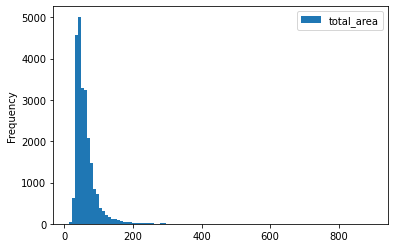

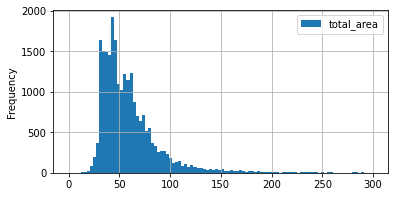

In [28]:
# Изучим общую площадь.
df.plot(y= 'total_area', kind= 'hist', bins= 100)
df.plot(y= 'total_area', kind= 'hist', bins= 100, grid=True, figsize=(6,3), range=(0,300))
print(df['total_area'].describe())
# Частота распределения данных нормальная, хоть в данных и присутствуют некоторые выбросы.
# С помошью describe получил общее представление.

**Вывод:** 
Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Гаусса.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


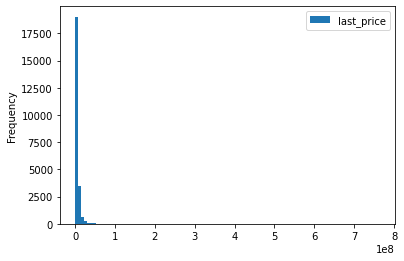

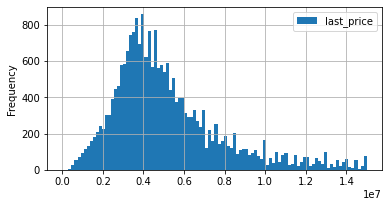

In [29]:
# Изучим цену.
df.plot(y = 'last_price', kind = 'hist', bins = 100)
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (6,3))
print(df['last_price'].describe())
# С данными все впорядке но значения выводятся в экспоненциальной записи чисел.

**Вывод:** 
Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Распределение данных Гаусса.


count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


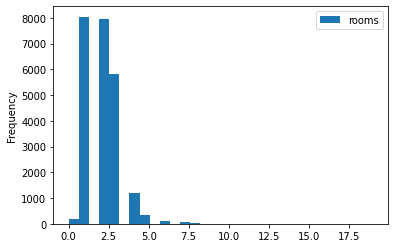

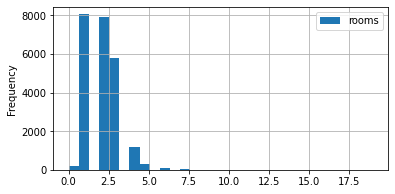

In [30]:
print('')
# Изучим число комнат.
df.plot(y = 'rooms', kind = 'hist', bins = 30)
df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (6,3))
print(df['rooms'].describe())
# С данными все впорядке.

**Вывод:**
Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир.


count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64
2.65


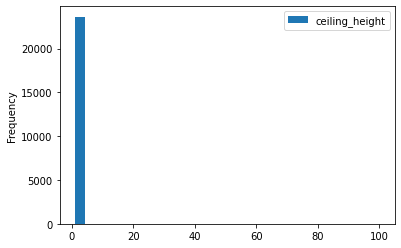

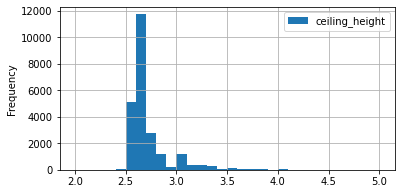

In [31]:
print('')
# Изучим высоту потолков.
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30)
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (6,3))
print(df['ceiling_height'].describe())
print(df['ceiling_height'].median())
# С данными все впорядке.

**Вывод:** 
Высота потолков в среднем составляет 2,72 м, медиана 2,65 м.

**4.2.** Изучим время продажи квартиры и построим гистограмму.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
78,9,4350000,37.0,2018-02-22,1,2.65,19.0,18.0,6,0,0,0,10.7,0,Санкт-Петербург,34324.0,14192.0,0,0,0,0,45,117567,3,2,2018,другой,0.486486,0.289189
89,9,2500000,63.0,2018-10-25,3,2.50,5.0,43.0,4,0,0,0,9.0,0,посёлок городского типа Сиверский,NaN,NaN,0,0,0,0,45,39682,3,10,2018,другой,0.682540,0.142857
110,6,3850000,72.3,2017-09-29,2,2.65,3.0,27.4,2,0,0,0,23.6,0,деревня Пикколово,NaN,NaN,0,0,0,0,45,53250,4,9,2017,другой,0.378976,0.326418
153,12,4350000,55.0,2017-05-21,2,2.57,9.0,31.2,2,0,0,0,8.3,0,Петергоф,45958.0,34425.0,1,589,0,0,45,79090,6,5,2017,другой,0.567273,0.150909
158,15,3100000,47.3,2017-11-07,2,2.65,5.0,27.5,2,0,0,0,8.5,0,городской посёлок Янино-1,NaN,NaN,0,0,0,0,45,65539,1,11,2017,другой,0.581395,0.179704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,10,2900000,43.4,2018-01-11,2,2.65,5.0,56.0,1,0,0,0,18.0,0,Санкт-Петербург,22001.0,14193.0,1,202,2,397,45,66820,3,1,2018,первый,1.290323,0.414747
23613,4,3950000,52.0,2018-03-04,3,2.65,5.0,56.0,2,0,0,0,18.0,0,посёлок Парголово,55549.0,21223.0,0,0,0,0,45,75961,6,3,2018,другой,1.076923,0.346154
23670,9,2450000,45.6,2018-02-08,1,2.80,9.0,56.0,2,0,0,0,18.0,0,поселок городского типа Синявино,NaN,NaN,0,0,0,0,45,53728,3,2,2018,другой,1.228070,0.394737
23679,0,2500000,35.0,2017-12-08,1,2.65,9.0,56.0,4,0,0,0,18.0,0,Сосновый Бор,NaN,NaN,0,0,0,0,45,71428,4,12,2017,другой,1.600000,0.514286


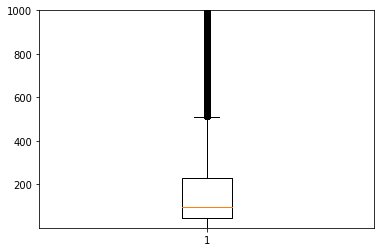

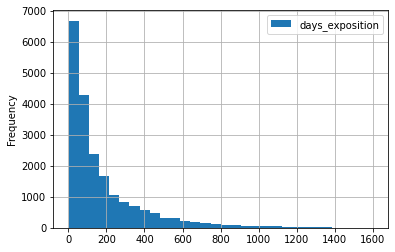

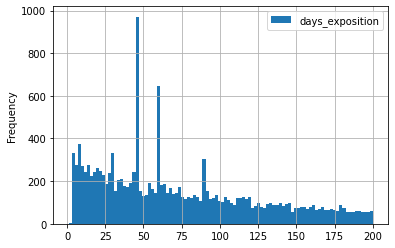

In [32]:
# Диаграмма размаха.
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

df.plot(y='days_exposition', kind='hist', bins=30, grid=True, range=(1,1600))
df.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(1,200))

# Среднее значение, медиана и межквартильный размах.
print(df[df['days_exposition']!=0]['days_exposition'].describe())
print('')

print(df[df['days_exposition']!=0]['days_exposition'].value_counts())
df[df['days_exposition']==45]

**Вывод:** судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления. Проверив данные на какие либо общие особенности по снятым обьявлениям через 45 дней мы не обнаруживаем никаких взаимосвязей. Скорее всего агрегатор "Яндекс недвижемость" снимает обьявления с публикации автомотически через 45, 60, 7, 30, 90 дней.

**4.3.** Уберем редкие и выбивающиеся значения. Опишим, какие особенности обнаружили.

4       176
3       158
5       152
14      148
9       143
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1136, dtype: int64


count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

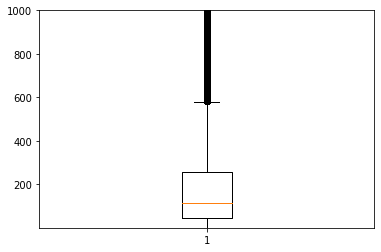

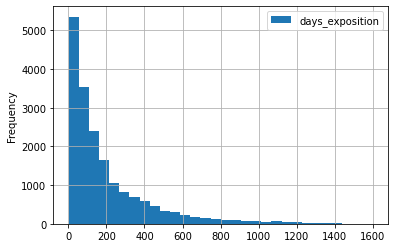

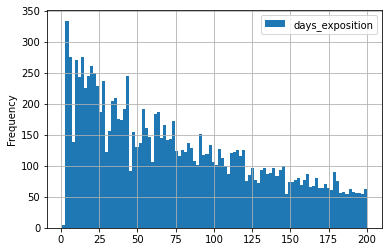

In [33]:
# Отфильтруем данные от аномальных выбросов в df которые мы обноружили в предыдущем шаге и запишем их в переменную good_df.
good_df = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

# Диаграмма размаха.
plt.boxplot(good_df['days_exposition'])
plt.ylim(1,1000)

# Гистограммы.
good_df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
good_df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

# Среднее значение, медиана и межквартильный размах.
print(good_df['days_exposition'].value_counts())
good_df['days_exposition'].describe()

**Вывод:** Итак, после обработки данных мы замечаем, что медеанное значение возрастает, соответственно отчистив данные от аномальных выбросов мы понимаем что в среднем требуется 114 дней от размещения до снятия для продажи квартиры. Так же теперь нормальные значения распологаются в диапозоне от 1 до 600.

**4.4.** Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.
1. Изучим зависимость цены от общей площади квартиры.

In [34]:
good_df[['last_price', 'total_area', 'rooms']].corr()

,last_price,total_area,rooms
last_price,1.000000,0.643337,0.354463
total_area,0.643337,1.000000,0.760935
rooms,0.354463,0.760935,1.000000


                   mean  count       median
total_area                                 
900.00      420000000.0      1  420000000.0
401.00      401300000.0      1  401300000.0
618.00      300000000.0      1  300000000.0
285.70      245000000.0      1  245000000.0
410.00      240000000.0      1  240000000.0
...                 ...    ...          ...
54.33         1300000.0      1    1300000.0
14.00         1190000.0      1    1190000.0
28.60         2034000.0      5    1060000.0
19.50          945750.0      1     945750.0
28.66          690000.0      1     690000.0

[2182 rows x 3 columns]


0.6536750579657243

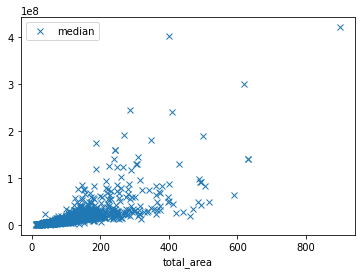

In [35]:
pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'x')

print(pivot_table_total_area.sort_values('median', ascending = False))

df['total_area'].corr(df['last_price'])

**Вывод:** видим, что зависимость слабая - согласно корреляции Пирсона - 0.6. То есть, чем больше площадь тем немного выше стоимость.

2. Изучим зависимость цены квадратного метра от этажа первого последнего или другого.

                        mean  count   median
floor_category                              
другой          6.674074e+06  17363  4850000
первый          4.803560e+06   2917  3900000
последний       7.361025e+06   3336  4300000


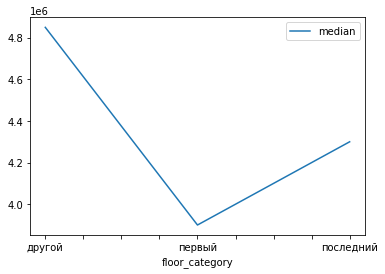

In [36]:
pivot_table_floor_category = df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
print(pivot_table_floor_category)

**Вывод:** Согласно медиане - как правило квартиры на первом этаже дешевле квартир на последнем этаже - в среднем на 10%!

3. Изучим зависимость цены от удалённости от центра.

-0.20674734874298387

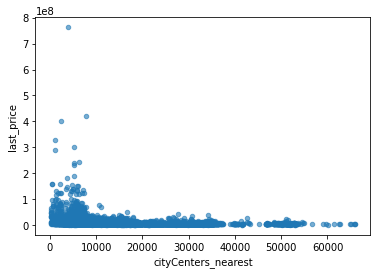

In [37]:
df.plot(kind='scatter', y='last_price', x='cityCenters_nearest', alpha = 0.6)

df['cityCenters_nearest'].corr(df['last_price'])

**Вывод:** Видим явную зависимость стоимости квадратного метра от близости к центру. Чем ближе к центру, тем выше стоимость.

 4. Изучим зависимость цены от даты размещения: дня недели.

,mean,count,median
weekday_exposition,,,
1,6.394233e+06,4183,4730000
2,6.627970e+06,3974,4700000
0,6.511613e+06,3612,4650000
3,6.708663e+06,4295,4650000
4,6.372131e+06,4000,4585000
5,6.976804e+06,1936,4555000
6,6.246180e+06,1699,4550000


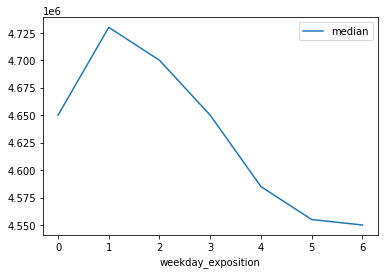

In [38]:
pivot_table_weekday_exposition = df.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

**Вывод:** Видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно! По воскресеньям стоимость самая низкая!

Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены.

5. Изучим зависимость цены от даты размещения: месяца.

,mean,count,median
month_exposition,,,
4,6.737198e+06,2379,4800000
9,6.825470e+06,1981,4700000
11,6.461363e+06,2371,4700000
12,7.011731e+06,1641,4700000
2,6.468500e+06,2640,4650000
3,6.359275e+06,2587,4650000
7,6.649337e+06,1695,4650000
1,6.668233e+06,1500,4600000
8,6.350233e+06,1744,4570000


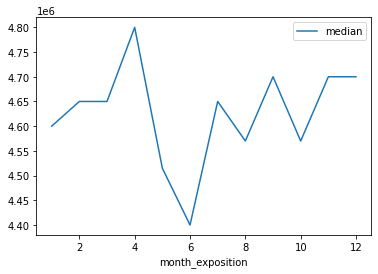

In [39]:
pivot_table_month_exposition = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median'/)

pivot_table_month_exposition.sort_values('median', ascending = False)

**Вывод:** самая высокая стоимость в апреле и августе. Самая низкая стоимость в мае и июне. На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками.

6. Изучим зависимость конечной цены от даты размещения: года.

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000
2015,8.572833e+06,1191,5350000
2019,6.782388e+06,2879,5050000
2016,6.827912e+06,2783,4550000
2018,5.950966e+06,8519,4550000
2017,6.585729e+06,8190,4500000


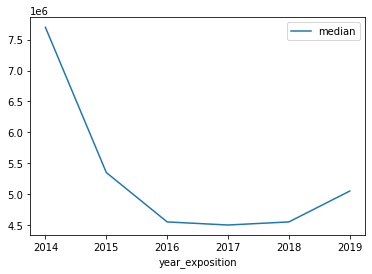

In [40]:
pivot_table_year_exposition = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

**Вывод:** видим, что с 2014 до 2016 года цена падала, но далее начала увеличиваться.

**4.5.** Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [41]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
display(locality_pivot_table)

#самая высокая стоимость
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])

#самая низкая стоимость
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


,count,mean
locality_name,,
Выборг,237,58141.489451


**Вывод:** Самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

**4.6.** Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построем график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

,price_per_square_meter
cityCenters_nearest_km,
0,187323.674419
1,166603.312500
2,146662.420195
3,129415.891635
4,137475.039691
5,146978.789337
6,152277.455319
7,141399.287469
8,120580.929851


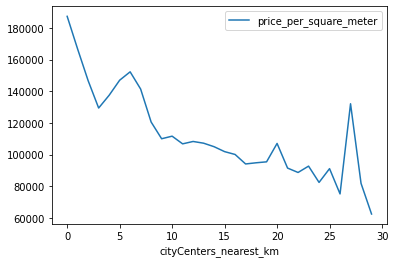

In [42]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(999999)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
display(pivot_table_km)

**Вывод:** Судя по графику центр находится в радиусе 7 километров.

**4.7.** Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всей базе?

1. Зависимость стоимости конечной от количества комнат.

0.3333422899982652

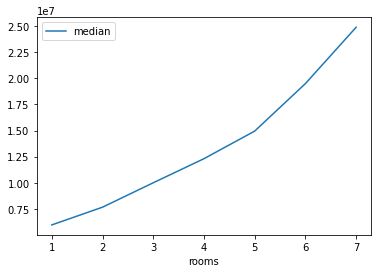

In [43]:
center_spb_df = df.query('cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург"')

center_spb_rooms = center_spb_df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_df['rooms'].corr(center_spb_df['last_price'])



**Вывод:** Чем больше комнат тем дороже конечная цена.

2. Зависимость стоимости от этажа.

,mean,count,median
floor_category,,,
другой,1.456834e+07,2646,9500000
первый,9.167233e+06,407,6550000
последний,1.881441e+07,652,9175000


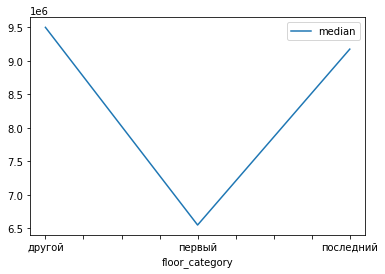

In [44]:
center_spb_floor_category = center_spb_df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_category.columns = ['mean', 'count', 'median']
center_spb_floor_category.plot(y = 'median')
display(center_spb_floor_category)

**Вывод:** Нет особых отличий от всей выборки квартир. Квартиры на первом этаже в среднем дешевле, чем на последнем.

3. Зависимость стоимости от удаленности от центра.

-0.048304000474881564

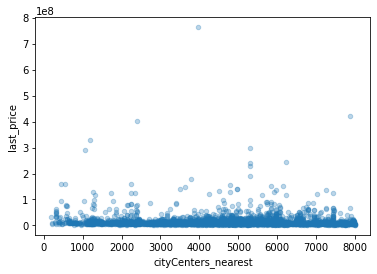

In [45]:
center_spb_df.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.3)

center_spb_df['cityCenters_nearest'].corr(center_spb_df['last_price'])

**Вывод:** Четкой зависимости нет, так как у нас уже сделана выборка по центру города.

4. Зависимость стоимости от дня недели размещения объявления.

,mean,count,median
weekday_exposition,,,
0,1.444047e+07,560,9325000
3,1.434801e+07,763,9250000
6,1.503329e+07,210,9200000
2,1.475535e+07,637,9190000
1,1.394717e+07,631,9000000
4,1.423913e+07,629,8990000
5,1.889688e+07,282,8525000


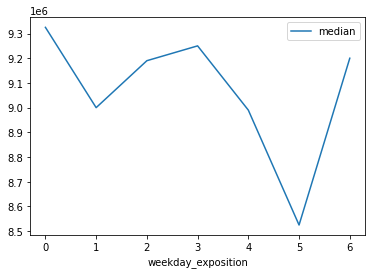

In [46]:
center_spb_weekday_exposition = center_spb_df.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

**Вывод:** Ситуация отличается от всей выборки, минимальные средние пятница и четверг, самые высокие - в понедельник, четверг и воскресенье.

5. Зависимость стоимости от месяца размещения объявления.

,mean,count,median
month_exposition,,,
1,1.574588e+07,226,9900000
2,1.482058e+07,406,9500000
3,1.443425e+07,395,9400000
9,1.544356e+07,323,9400000
11,1.383857e+07,373,9300000
7,1.486899e+07,288,9040000
8,1.363078e+07,273,8900000
4,1.588917e+07,350,8875000
5,1.439314e+07,208,8825000


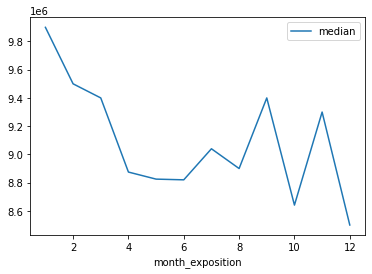

In [47]:
center_spb_month_exposition = center_spb_df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

**Вывод:** Дороже всего конечная стоимость в январе, феврале. Дешевле в октябре, декабре

6. Зависимость стоимости от года размещения объявления.

,mean,count,median
year_exposition,,,
2015,1.688356e+07,328,9995000
2019,1.521953e+07,401,9476000
2016,1.531084e+07,522,9400000
2017,1.527439e+07,1331,8990000
2018,1.271018e+07,1103,8750000


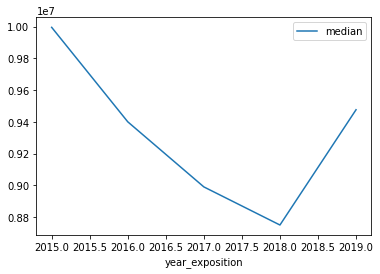

In [48]:
center_spb_year_exposition = center_spb_df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 50').plot(y = 'median')

center_spb_year_exposition.query('count > 50').sort_values('median', ascending = False)

**Вывод:** Цены на недвижимость в центре СПБ планомерно снижались с 2015 по 2018, но потом начался резкий рост.

## Общий вывод

В первом шаге мы открыли файл с данными и сохранили его в переменную df. Также предварительно ознакомились с содержимым датафрейма, колличеством и форматом данных в нем. Далее приступили к предобработке данных. В датафрейме требовалось заменить некоторые очеведные пропуски которые наверняка присутствовали из-за того что пользователи не заполняли некоторую информацию в своих обьявлениях. Ярким примером служит столбец содержащий значения указывающие на наличие балконов в квартире, для отсутствующих значений в таком столбце мы установили чилсо 0. Также посчитали и добавили в таблицу цену квадратного метра жилья, добавили категории по этажам квартир и вывели из даты дни недели, месяцы и года размещения объявлений. Еще в процессе предобработки мы выявили выбивающиеся значения в столбцах площадь, цена, число комнат, высота потолков. Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. Мы выявили при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней. Мы выявили, что на конечную стоимость квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Также значительно на конечную стоимость влияют день, месяц, год размещения и общая площадь.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод